In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression , LogisticRegressionCV
plt.rc("font", size=10)

In [17]:
df=pd.read_csv('raw.githubusercontent.com_madmashup_targeted-marketing-predictive-engine_master_banking.csv')

In [18]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0.0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1.0
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0.0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1.0


In [19]:
df.isnull().sum().sum()

6

In [20]:
df.shape

(26535, 21)

In [21]:
print(list(df.columns))

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [22]:
df['job'].value_counts()

admin.           6687
blue-collar      5978
technician       4341
services         2510
management       1919
retired          1102
entrepreneur      966
self-employed     931
housemaid         679
unemployed        633
student           566
unknown           223
Name: job, dtype: int64

In [23]:
df['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [24]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [25]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

The education column has many categories and we need to reduce the categories for a better modelling

Let us group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”.

In [26]:
df['education']=np.where(df['education']=='basic.4y','Basic',df['education'])
df['education']=np.where(df['education']=='basic.6y','Basic',df['education'])
df['education']=np.where(df['education']=='basic.9y','Basic',df['education'])

After grouping, this is the columns:

In [27]:
df['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [28]:
df['default'].unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26535 entries, 0 to 26534
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             26535 non-null  int64  
 1   job             26535 non-null  object 
 2   marital         26535 non-null  object 
 3   education       26535 non-null  object 
 4   default         26535 non-null  object 
 5   housing         26535 non-null  object 
 6   loan            26535 non-null  object 
 7   contact         26535 non-null  object 
 8   month           26535 non-null  object 
 9   day_of_week     26535 non-null  object 
 10  duration        26535 non-null  int64  
 11  campaign        26535 non-null  int64  
 12  pdays           26535 non-null  int64  
 13  previous        26535 non-null  int64  
 14  poutcome        26535 non-null  object 
 15  emp_var_rate    26534 non-null  float64
 16  cons_price_idx  26534 non-null  float64
 17  cons_conf_idx   26534 non-null 

In [30]:
df['y'].value_counts()

0.0    23479
1.0     3055
Name: y, dtype: int64

y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

Data exploration

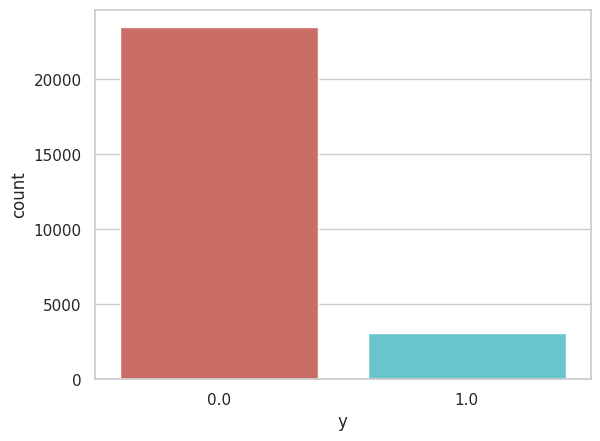

In [31]:
sns.countplot(x='y',data=df,palette='hls')
plt.show()

Our classes are imbalanced, Before we go ahead to balance the classes, let’s do some more exploration.



In [32]:
df.groupby('y').mean()

<ipython-input-32-e1dafff4daf8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('y').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0.0,39.910899,219.470080,2.635887,984.543890,0.133907,0.251480,93.606358,-40.573044,3.814634,5176.192334
1.0,40.701146,556.452046,2.031097,790.950573,0.487070,-1.213552,93.370053,-39.887496,2.135008,5095.507660


The customers who purchased the term deposit have a higher average age compared to those who did not make the purchase.


Customers who purchased the term deposit tend to have a naturally shorter duration since their last contact, indicating a stronger recollection of the previous call and thus higher likelihood of a successful sale.


Remarkably, the number of contacts or calls made during the ongoing campaign is reduced among customers who opted for the term deposit.

.

To gain a more comprehensive understanding of our data, I can compute categorical means for additional variables like education and marital status.

In [33]:
df.groupby('job').mean()

<ipython-input-33-bb859882ed41>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('job').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.102288,254.599970,2.608644,955.500224,0.190070,0.016704,93.537921,-40.280888,3.548575,5163.958576,0.134141
blue-collar,39.451656,263.929575,2.554868,985.552191,0.122449,0.258782,93.663685,-41.370492,3.780809,5175.921646,0.069254
entrepreneur,41.673913,268.369565,2.594203,978.430642,0.138716,0.169462,93.607479,-41.126812,3.813107,5176.360145,0.097308
housemaid,45.519882,254.412371,2.652430,966.823270,0.110457,0.462150,93.687080,-39.591458,4.040230,5181.219293,0.092784
management,42.387181,255.921313,2.512246,958.627931,0.195414,-0.030328,93.525875,-40.490620,3.582950,5165.397134,0.113080
retired,62.127949,279.692377,2.419238,901.634301,0.331216,-0.723049,93.426040,-38.458439,2.748401,5120.965517,0.255898
self-employed,39.934479,262.816327,2.664876,976.586466,0.160043,0.072932,93.546426,-40.478518,3.681635,5170.399785,0.099893
services,37.909163,259.813546,2.600797,980.005578,0.153785,0.216660,93.651030,-41.199083,3.740602,5172.803308,0.086887
student,25.922261,273.491166,2.090106,837.747350,0.531802,-1.430035,93.340569,-40.334276,1.847788,5083.823675,0.328622


In [34]:
df.groupby('marital').mean()

<ipython-input-34-aa67e1a5c2fa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('marital').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.789350,252.319178,2.578362,967.867206,0.175261,0.142602,93.602852,-40.773441,3.692073,5169.991304,0.103134
married,42.281065,257.927198,2.581544,967.919669,0.156057,0.188768,93.602131,-40.253304,3.750339,5171.939371,0.103547
single,33.172687,261.211763,2.523029,947.949644,0.213509,-0.166873,93.520881,-40.898738,3.317179,5154.886263,0.144756
unknown,40.240000,286.760000,3.340000,939.580000,0.280000,-0.336000,93.465700,-41.050000,3.217640,5154.556000,0.140000


In [35]:
df.groupby('education').mean()

<ipython-input-35-f8d0642ca27f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('education').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.131010,262.219627,2.555803,976.299716,0.141762,0.194661,93.644792,-40.893141,3.736538,5172.081016,0.087134
high.school,37.965137,263.197500,2.576385,964.886203,0.184345,0.049507,93.592977,-40.895576,3.571425,5165.295493,0.112664
illiterate,47.083333,247.583333,2.416667,999.000000,0.083333,0.225000,93.433583,-42.450000,3.839083,5187.775000,0.166667
professional.course,40.057278,255.692058,2.596988,959.743136,0.160319,0.179097,93.571147,-40.143608,3.714380,5170.538028,0.118984
university.degree,38.895226,250.772120,2.555824,950.056015,0.198218,-0.043806,93.492923,-39.988224,3.510297,5162.305716,0.140038
unknown,43.218215,263.681695,2.567178,939.059513,0.237151,0.050406,93.661212,-40.014427,3.552376,5159.165555,0.144274


Visualizations

Text(0, 0.5, 'Frequency of purchase')

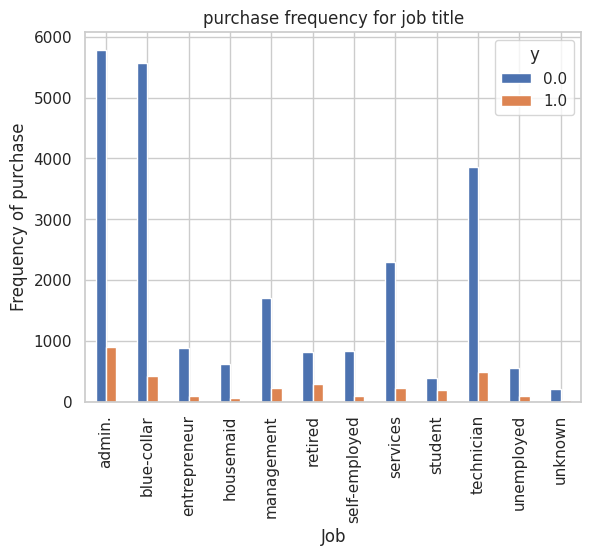

In [36]:
%matplotlib inline
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('purchase frequency for job title')
plt.xlabel('Job')
plt.ylabel('Frequency of purchase')

The outcome variable can be predicted well by considering the job title, as it significantly influences the frequency of deposit purchase.

Text(0, 0.5, 'Proportion of Customers')

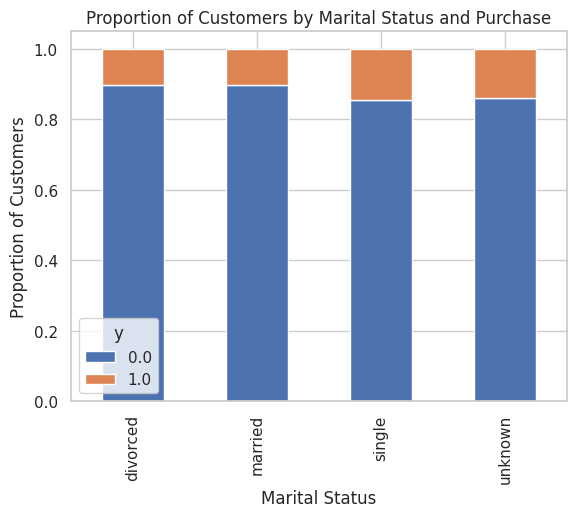

In [37]:
table = pd.crosstab(df.marital, df.y)
table_proportions = table.div(table.sum(1).astype(float), axis=0)
table_proportions.plot(kind='bar', stacked=True)
plt.title('Proportion of Customers by Marital Status and Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')


The outcome variable does not appear to be strongly predicted by marital status.

Text(0, 0.5, 'Proportion of Customers')

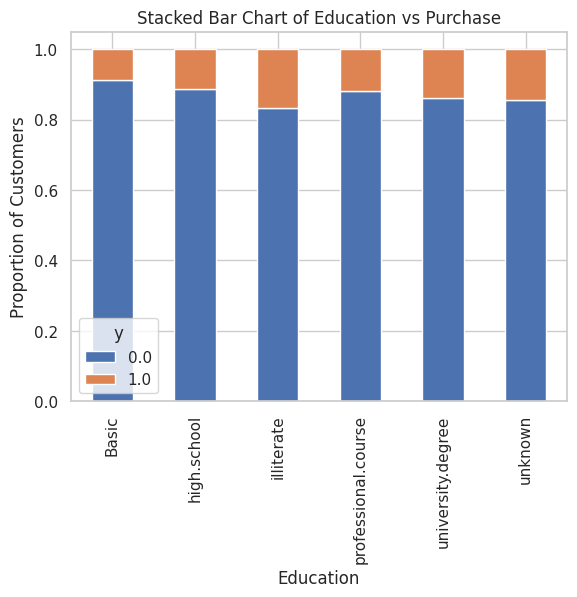

In [38]:
table=pd.crosstab(df.education,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')


Education appears to be a reliable indicator of the dependent variable.

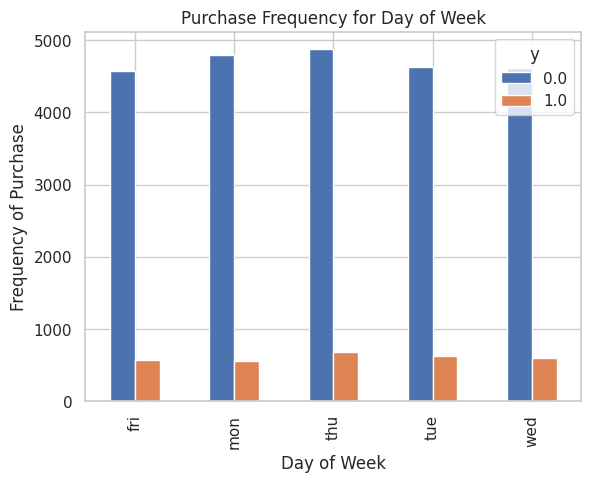

In [39]:
cross_tab = pd.crosstab(df.day_of_week, df.y)
cross_tab.plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

day_of_week may not be a good predictor of the outcome

.

Dummy Variables

this is variables with only two values,zero and one

In [40]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    df=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]


In [41]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonex,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,0,0,0,1,0,0,0,0,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,0,1,0,0,0,0,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,0,0,0,1,0,0,0,0,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,0,1,0,0,0,0,0,0,1,0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,0,1,0,0,0,0,0,0,0,1


In [42]:
data=df[to_keep]

In [43]:
data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
      

Over-Sampling using SMOTE
more details about SMOTE:- https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [44]:
X = data.loc[:, data.columns != 'y']
y = data.loc[:, data.columns == 'y']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])


In [45]:
print(os_data_X.shape)
print(os_data_y.shape)

(32792, 62)
(32792, 1)


We have achieved a well-balanced dataset now! You might have observed that I applied oversampling exclusively to the training data. This approach ensures that synthetic observations are generated solely from the training data, preventing any information leakage from the test data into the model training process.

.

Now RFE
The objective of Recursive Feature Elimination (RFE) is to choose features by iteratively evaluating increasingly reduced sets of features.

In [50]:
'''data_final_vars=data.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE

logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

print(rfe.support_)
print(rfe.ranking_)'''
data_final_vars = data.columns.values.tolist()
y = ['y']
X = [i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE

logreg = LogisticRegression()

rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

print(rfe.support_)
print(rfe.ranking_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[False False False False False False False False False False False  True
  True  True  True False  True  True False  True False  True  True  True
  True False  True  True False  True  True  True False False False  True
  True  True  True  True  True  True  True False False False False False
 False False False False False  True  True  True  True  True  True False
  True False]
[26 24 20 28 19 22 16 25 14 23  2  1  1  1  1  5  1  1  4  1  3  1  1  1
  1 29  1  1 30  1  1  1 27 17 31  1  1  1  1  1  1  1  1 11  7 12  8 10
 21  9  6 15 13  1  1  1  1  1  1 32  1 18]


The following features have been selected using RFE: "euribor3m", "job_blue-collar", "job_housemaid", "marital_unknown", "education_illiterate", "default_no", "default_unknown", "contact_cellular", "contact_telephone", "month_apr", "month_aug", "month_dec", "month_jul", "month_jun", "month_mar", "month_may", "month_nov", "month_oct", "poutcome_failure", "poutcome_success".

In [53]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown',
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"]
X=os_data_X[cols]
y=os_data_y['y']

Implementing the model

In [55]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.450876
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.350     
Dependent Variable:   y                 AIC:               29610.2590
Date:                 2023-06-21 13:11  BIC:               29778.2178
No. Observations:     32792             Log-Likelihood:    -14785.   
Df Model:             19                LL-Null:           -22730.   
Df Residuals:         32772             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m             0.1641   0.0101  16.2326 0.0000  0.1443  0.1839
job_blue-collar 

Logistic Regression Model Fit


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.87


Confusion Matrix

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4448  424]
 [ 891 4075]]


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      4872
         1.0       0.91      0.82      0.86      4966

    accuracy                           0.87      9838
   macro avg       0.87      0.87      0.87      9838
weighted avg       0.87      0.87      0.87      9838



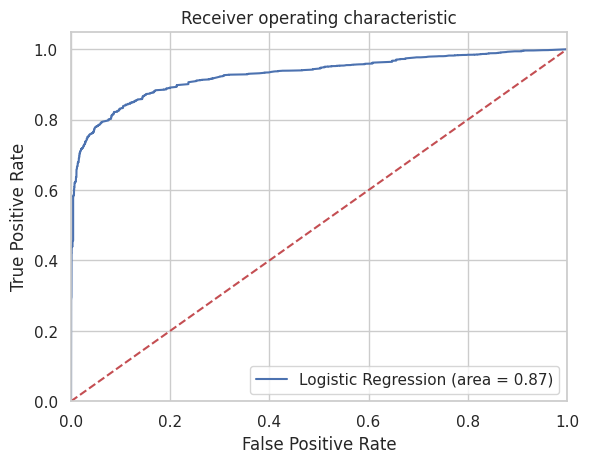

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [63]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
